# Notebook 3 - Exploratory Data Analysis (EDA)
This notebook will perform EDA on the cleaned, tokenized, and normalized text to gain further insights into the lyrics pulled from the Genius API, such as descriptive statistics.

In [1]:
# Needed Packages
# NOTE. for wordcloud to work - Python ver. 3.9.5 was used
from collections import Counter
# Pandas version 1.4.4
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Read in preprocessed data
preproc_df = pd.read_csv("data/genre_prepped.csv.gz", compression = "gzip",
                         converters = {"tokens": pd.eval})

# drop unnecessary columns (index and unnamed index columns)
preproc_df = preproc_df.drop(preproc_df.columns[0:2], axis = 1)

# Sample Table
preproc_df.head(5)

,artist,title,lyrics,genre,tokens,lyrics_clean
0,Taylor Swift,​betty,"Betty, I won't make assumptions\nAbout why you...",['country'],"[betty, make, assumptions, switched, homeroom,...",betty make assumptions switched homeroom think...
1,John Denver,"Take Me Home, Country Roads","Almost Heaven, West Virginia\nBlue Ridge Mount...",['country'],"[almost, heaven, west, virginia, blue, ridge, ...",almost heaven west virginia blue ridge mountai...
2,Post Malone,Feeling Whitney,"I've been looking for someone...\nOoh, ooh, oo...",['country'],"[looking, someone, ooh, ooh, ooh, ooh, ooh, oo...",looking someone ooh ooh ooh ooh ooh oohooh ooh...
3,Cam,Burning House,\n[Verse 1]\nI had a dream about a burning hou...,['country'],"[1, dream, burning, house, stuck, inside, get,...",1 dream burning house stuck inside get laid be...
4,Johnny Cash,Folsom Prison Blues,"I hear the train a-comin', it's rolling 'round...",['country'],"[hear, train, acomin, rolling, round, bend, ai...",hear train acomin rolling round bend aint seen...


## EDA

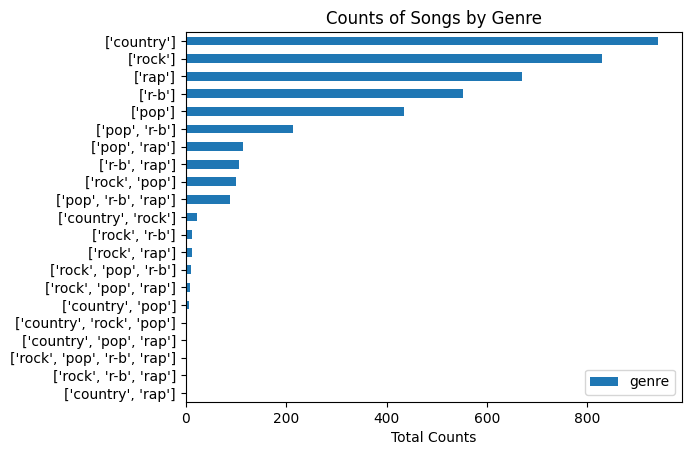

In [3]:
# Plot the total number of songs by genre
preproc_df["genre"].value_counts().sort_values(ascending = True).plot(
    kind = "barh",
    title = "Counts of Songs by Genre",
    xlabel = "Total Counts"
).legend(loc = "lower right");

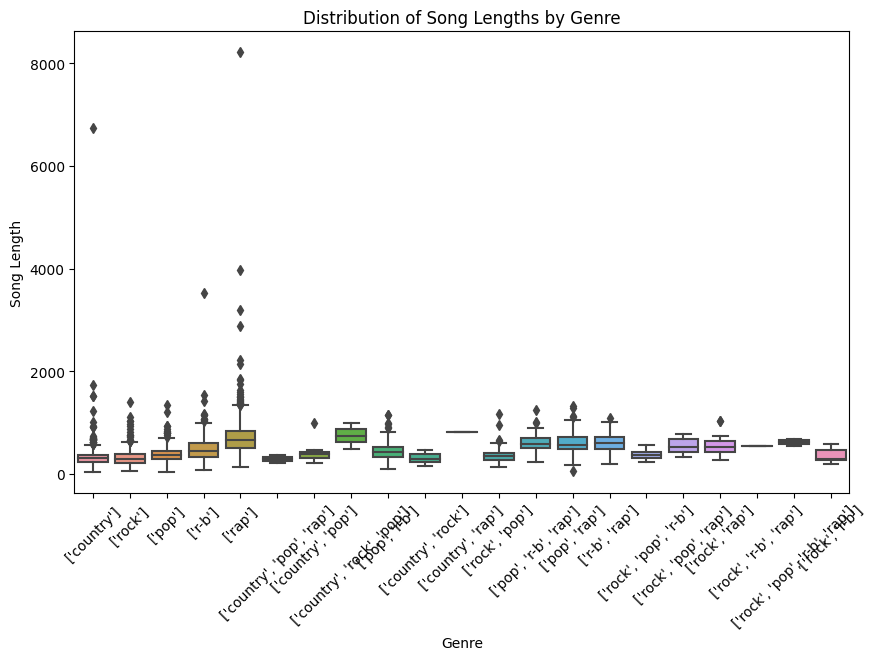

In [4]:
#Plot distribution of song lengths by genre

preproc_df["lyrics_length"] = preproc_df["lyrics"].apply(lambda x: len(x.split()))


plt.figure(figsize=(10, 6))
sns.boxplot(data=preproc_df, x="genre", y="lyrics_length")
plt.title("Distribution of Song Lengths by Genre")
plt.xlabel("Genre")
plt.ylabel("Song Length")
plt.xticks(rotation=45)
plt.show()


## Descriptive Statistics

In [ ]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens) #length of tokens
    num_unique_tokens = (len(set(tokens)))
    lexical_diversity = (num_unique_tokens / num_tokens) #ratio of different unique word stems (types) to the total number of words (tokens).
    num_characters = sum(len(token) for token in tokens) #length of the string of tokens
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5)) #p. 16 of textbook
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [ ]:
# Descriptive stats calculated for each genre

# Iterate over each genre and calculate descriptive statistics
for genre in preproc_df["genre"].unique():
    genre_tokens = [token for tokens in preproc_df.loc[preproc_df["genre"] == genre, "tokens"] for token in tokens]
    print(f"Genre: {genre}")
    descriptive_stats(genre_tokens)
    print()

Genre: ['country']
There are 160986 tokens in the data.
There are 16815 unique tokens in the data.
There are 776360 characters in the data.
The lexical diversity is 0.104 in the data.
[('', 3411), ('know', 1629), ('love', 1317), ('got', 1179), ('might', 1148)]

Genre: ['rock']
There are 130210 tokens in the data.
There are 14360 unique tokens in the data.
There are 640860 characters in the data.
The lexical diversity is 0.110 in the data.
[('', 1790), ('know', 1501), ('love', 1219), ('might', 940), ('got', 892)]

Genre: ['pop']
There are 85968 tokens in the data.
There are 11896 unique tokens in the data.
There are 411910 characters in the data.
The lexical diversity is 0.138 in the data.
[('', 1205), ('love', 1091), ('know', 929), ('go', 560), ('never', 549)]

Genre: ['r-b']
There are 131678 tokens in the data.
There are 12403 unique tokens in the data.
There are 614416 characters in the data.
The lexical diversity is 0.094 in the data.
[('', 4197), ('know', 2418), ('love', 1984), ('g

# Build Word Cloud for each Genre

In [ ]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column = 'tokens', preprocess = None, min_freq = 2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

The main 5 genres of interest are: country, rap, pop, rock, and R&B (r-b, as represented in the data).

In [ ]:
# Create a subset dataframe for the genre
genre_list = ["rap", "country", "rock", "pop", "r-b"]

# WordCloud Function
def make_wordcloud(genre):
    genre_subset = preproc_df.loc[preproc_df["genre"] == str([genre])]
    genre_word_count = count_words(genre_subset)
    wordcloud(genre_word_count.squeeze(),
              title = "Genre: {}".format(genre))

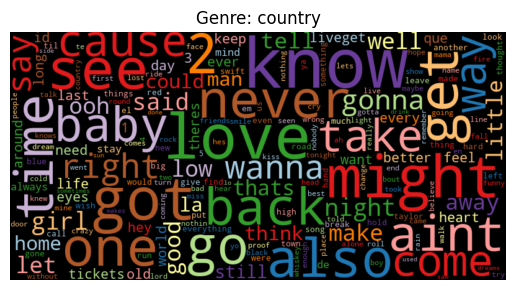

In [ ]:
make_wordcloud("country")

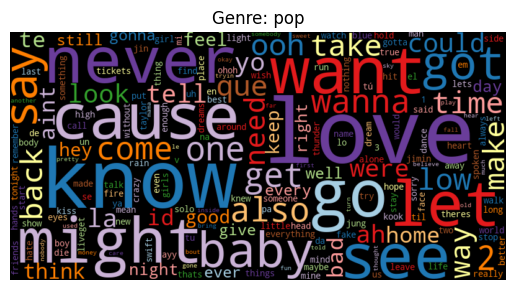

In [ ]:
make_wordcloud("pop")

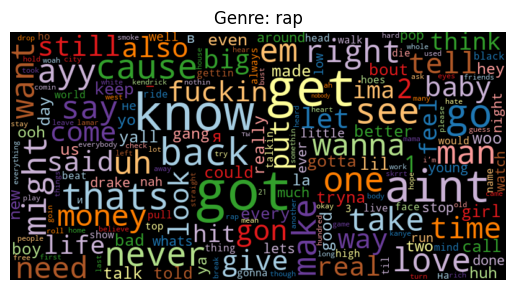

In [ ]:
make_wordcloud("rap")

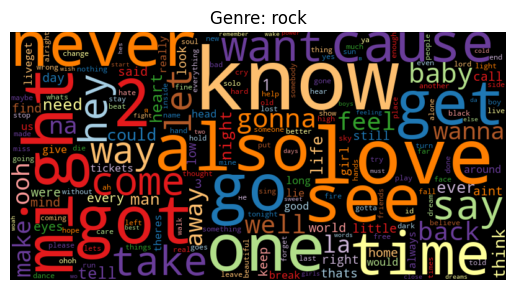

In [ ]:
make_wordcloud("rock")

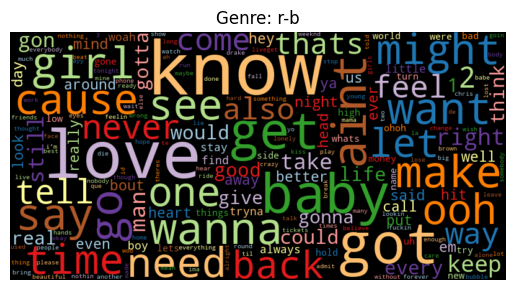

In [ ]:
make_wordcloud("r-b")